# Examen Python 

<img src="https://datahack.analyticsvidhya.com/media/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png">

## Loan Prediction Database

#### Daniel Yañez Montor
<br>
15/Noviembre/2018




### 1. Importación y validacíon de los datos 


In [74]:
#Importamos paquetes y funciones a utilizar
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

#Modificamos el directorio de trabajo
os.chdir("C:\\Users\\dym21\\Desktop\\Python Dir")

#Asignamos nombres a archivos y Variables
filename1='test.csv'
filename2='train.csv'
colnom1 = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]
colnom2 = ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]

#Importamos los datos con pandas
test_set=pd.read_csv(filename1,nrows=368,header=None,comment='#',na_values='-1',names=colnom1)
train_set=pd.read_csv(filename2,nrows=615,header=None,comment='#',na_values='-1',names=colnom2)

#Validamos primeras observaciones
print(test_set)
print(train_set)



      Loan_ID  Gender  Married  Dependents     Education  Self_Employed  \
0     Loan_ID  Gender  Married  Dependents     Education  Self_Employed   
1    LP001015    Male      Yes           0      Graduate             No   
2    LP001022    Male      Yes           1      Graduate             No   
3    LP001031    Male      Yes           2      Graduate             No   
4    LP001035    Male      Yes           2      Graduate             No   
5    LP001051    Male       No           0  Not Graduate             No   
6    LP001054    Male      Yes           0  Not Graduate            Yes   
7    LP001055  Female       No           1  Not Graduate             No   
8    LP001056    Male      Yes           2  Not Graduate             No   
9    LP001059    Male      Yes           2      Graduate            NaN   
10   LP001067    Male       No           0  Not Graduate             No   
11   LP001078    Male       No           0  Not Graduate             No   
12   LP001082    Male    

Podemos notar que la primera entrada de la base esta poblada con las variables, por lo que procederemos a eliminar dicha observacion.

In [75]:
#Eliminamos la primera observacion de cada dataset y validamos de nuevo
test_set.drop([0], axis=0, inplace=True)  
train_set.drop([0], axis=0, inplace=True)  

print("Base Test")
print(test_set)

print("Base Train")
print(train_set)


Base Test
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001015    Male     Yes          0      Graduate            No   
2    LP001022    Male     Yes          1      Graduate            No   
3    LP001031    Male     Yes          2      Graduate            No   
4    LP001035    Male     Yes          2      Graduate            No   
5    LP001051    Male      No          0  Not Graduate            No   
6    LP001054    Male     Yes          0  Not Graduate           Yes   
7    LP001055  Female      No          1  Not Graduate            No   
8    LP001056    Male     Yes          2  Not Graduate            No   
9    LP001059    Male     Yes          2      Graduate           NaN   
10   LP001067    Male      No          0  Not Graduate            No   
11   LP001078    Male      No          0  Not Graduate            No   
12   LP001082    Male     Yes          1      Graduate           NaN   
13   LP001083    Male      No         3+      Graduate

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001002    Male      No          0      Graduate            No   
2    LP001003    Male     Yes          1      Graduate            No   
3    LP001005    Male     Yes          0      Graduate           Yes   
4    LP001006    Male     Yes          0  Not Graduate            No   
5    LP001008    Male      No          0      Graduate            No   
6    LP001011    Male     Yes          2      Graduate           Yes   
7    LP001013    Male     Yes          0  Not Graduate            No   
8    LP001014    Male     Yes         3+      Graduate            No   
9    LP001018    Male     Yes          2      Graduate            No   
10   LP001020    Male     Yes          1      Graduate            No   
11   LP001024    Male     Yes          2      Graduate            No   
12   LP001027    Male     Yes          2      Graduate           NaN   
13   LP001028    Male     Yes          2      Graduate          

Con la validacíon anterior notamos que nuestros data sets ya tienen un único header

### 2. Descripción de los datos
<br>
Se anexa una tabla con las variables de los data sets al igual que una breve descripción de la variable, tipo y rango de salida:


|        Variable        |       Descripción      |      Tipo     |      Rango        |
| ---------------------- | ---------------------- | ------------- | ----------------- | 
| Loan_ID                | Unique Loan ID Number  | Char          | LP000000-LP999999 |
| Gender                 | Person's gender ID     | Fact          | Male-Female       |
| Married                | Marital status         | Fact          | Yes-No            |
| Dependents             | Number of dependents   | Fact          | 0,1,2,3+          |
| Education              | Applicant's Education  | Fact          | Graduate-Not Graduate |
| Self-Employed          | Self Employed          | Fact          | Yes-No            |
| ApplicantIncome        | Applicant Income       | Int           | 0-100000          |
| CoapplicantIncome      | Co Applicant Income    | Int           | 0-100000          |
| LoanAmount             | Amount of the Loan     | Int           | 0-1000            |
| Loan_Amount_Term       | Loan term in months    | Int/Fact      | 6-480             |
| Credit_History         | Cred. History meets guidelines  | Fact       | 0,1             |
| Property_Area          | Unique Loan ID Number  | Fact      | Urban, Rural, Semiurban             |
| Loan_Status            | Loan approval  | Fact      | Yes-No             |

### 3. Análisis exploratorio y limpieza de data frames

¿Cuantas observaciones tiene cada dataset?

<br>
Test Set:

In [76]:
print(len(test_set.index))


367


Train Set:

In [77]:
print(len(train_set.index))

614


¿Cuantas columnas tiene cada dataset?

<br>
Test Set:

In [78]:
print(len(test_set.columns))

12


Train Set:

In [79]:
print(len(train_set.columns))

13


¿Cuales son las primeras observaciones de los datasets?

In [80]:
print("Test Set")
print(test_set.head())

print("Train Set")
print(train_set.head())

Test Set
    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001015   Male     Yes          0      Graduate            No   
2  LP001022   Male     Yes          1      Graduate            No   
3  LP001031   Male     Yes          2      Graduate            No   
4  LP001035   Male     Yes          2      Graduate            No   
5  LP001051   Male      No          0  Not Graduate            No   

  ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term  \
1            5720                 0        110              360   
2            3076              1500        126              360   
3            5000              1800        208              360   
4            2340              2546        100              360   
5            3276                 0         78              360   

  Credit_History Property_Area  
1              1         Urban  
2              1         Urban  
3              1         Urban  
4            NaN         Urban  
5       

- Analizaremos la presencia de NA dentro de las bases

In [81]:
#Definiremos una funcion para contar nulos dentro de la base
def nulos(x):
    return x.isnull().sum()

Test Set:

Nulos por columna

In [82]:
print(test_set.apply(nulos,axis=0))

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


Nulos por fila

In [83]:
print(test_set.apply(nulos,axis=1))

1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     0
11     0
12     1
13     1
14     1
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     1
28     0
29     1
30     0
      ..
338    0
339    0
340    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
350    0
351    0
352    1
353    0
354    0
355    0
356    0
357    0
358    0
359    1
360    0
361    1
362    0
363    0
364    0
365    1
366    0
367    0
Length: 367, dtype: int64


Train Set:

Nulos por columna

In [84]:
print(train_set.apply(nulos,axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Nulos por fila

In [85]:
print(train_set.apply(nulos,axis=1))

1      1
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     1
18     0
19     0
20     2
21     0
22     0
23     0
24     1
25     2
26     0
27     0
28     0
29     0
30     1
      ..
585    0
586    0
587    0
588    0
589    1
590    0
591    0
592    0
593    1
594    0
595    0
596    0
597    0
598    1
599    0
600    0
601    2
602    1
603    0
604    0
605    0
606    1
607    0
608    0
609    0
610    0
611    0
612    0
613    0
614    0
Length: 614, dtype: int64


- Eliminaremos los NA de los data sets

In [86]:
print("Test Set")
test_set=test_set.dropna()
print(test_set.apply(nulos,axis=0))

print("Train Set")
train_set=train_set.dropna()
print(train_set.apply(nulos,axis=0))

Test Set
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Train Set
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Como podemos observar ya no hay valores nulos dentro de los data frames.

- Recodificaremos variables categoricas que estan siendo leidas como string

Primero crearemos nuestro diccionario para re codificar las variables

In [87]:
dic={"Male":1,"Female":0,"Yes":1,"No":0,"Graduate":1, "Not Graduate":0,"N":0, "Y":1} 
print(dic)

{'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0, 'Graduate': 1, 'Not Graduate': 0, 'N': 0, 'Y': 1}


Le aplicamos replace a los data sets

Test Set:

In [88]:
test_set=test_set.replace({"Gender":dic,"Married":dic,"Education":dic,"Self_Employed":dic})
print(test_set)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001015       1        1          0          1              0   
2    LP001022       1        1          1          1              0   
3    LP001031       1        1          2          1              0   
5    LP001051       1        0          0          0              0   
6    LP001054       1        1          0          0              1   
7    LP001055       0        0          1          0              0   
8    LP001056       1        1          2          0              0   
10   LP001067       1        0          0          0              0   
11   LP001078       1        0          0          0              0   
15   LP001096       0        0          0          1              0   
16   LP001099       1        0          1          1              0   
17   LP001105       1        1          2          1              0   
18   LP001107       1        1         3+          1              0   
19   L

Train Set

In [89]:
train_set=train_set.replace({"Gender":dic,"Married":dic,"Education":dic,"Self_Employed":dic,"Loan_Status":dic})
print(train_set)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
2    LP001003       1        1          1          1              0   
3    LP001005       1        1          0          1              1   
4    LP001006       1        1          0          0              0   
5    LP001008       1        0          0          1              0   
6    LP001011       1        1          2          1              1   
7    LP001013       1        1          0          0              0   
8    LP001014       1        1         3+          1              0   
9    LP001018       1        1          2          1              0   
10   LP001020       1        1          1          1              0   
11   LP001024       1        1          2          1              0   
13   LP001028       1        1          2          1              0   
14   LP001029       1        0          0          1              0   
15   LP001030       1        1          2          1              0   
16   L

### 4. Estadisticos de los data sets

In [90]:
#Obtenemos los estadisticos de cada data set
print("Test Set:")
print(" ")
print("Applicant Income: ")
print("El minimo es " + str(test_set["ApplicantIncome"].astype(float).min()))
print("El maximo es " + str(test_set["ApplicantIncome"].astype(float).max()))
print("La media es " + str(test_set["ApplicantIncome"].astype(float).mean()))
print("La mediana es " + str(test_set["ApplicantIncome"].astype(float).median()))
print("La desviación estándar es " + str(test_set["ApplicantIncome"].astype(float).std()))
print(" ")
print("Co-Applicant Income: ")
print("El minimo es " + str(test_set["CoapplicantIncome"].astype(float).min()))
print("El maximo es " + str(test_set["CoapplicantIncome"].astype(float).max()))
print("La media es " + str(test_set["CoapplicantIncome"].astype(float).mean()))
print("La mediana es " + str(test_set["CoapplicantIncome"].astype(float).median()))
print("La desviación estándar es " + str(test_set["CoapplicantIncome"].astype(float).std()))
print(" ")
print("Loan Amount: ")
print("El minimo es " + str(test_set["LoanAmount"].astype(float).min()))
print("El maximo es " + str(test_set["LoanAmount"].astype(float).max()))
print("La media es " + str(test_set["LoanAmount"].astype(float).mean()))
print("La mediana es " + str(test_set["LoanAmount"].astype(float).median()))
print("La desviación estándar es " + str(test_set["LoanAmount"].astype(float).std()))
print(" ")
print("Loan Amount Term: ")
print("El minimo es " + str(test_set["Loan_Amount_Term"].astype(float).min()))
print("El maximo es " + str(test_set["Loan_Amount_Term"].astype(float).max()))
print("La media es " + str(test_set["Loan_Amount_Term"].astype(float).mean()))
print("La mediana es " + str(test_set["Loan_Amount_Term"].astype(float).median()))
print("La desviación estándar es " + str(test_set["Loan_Amount_Term"].astype(float).std()))
print(" ")
print(" ")
print("Train Set:")
print(" ")
print("Applicant Income: ")
print("El minimo es " + str(train_set["ApplicantIncome"].astype(float).min()))
print("El maximo es " + str(train_set["ApplicantIncome"].astype(float).max()))
print("La media es " + str(train_set["ApplicantIncome"].astype(float).mean()))
print("La mediana es " + str(train_set["ApplicantIncome"].astype(float).median()))
print("La desviación estándar es " + str(train_set["ApplicantIncome"].astype(float).std()))
print(" ")
print("Co-Applicant Income: ")
print("El minimo es " + str(train_set["CoapplicantIncome"].astype(float).min()))
print("El maximo es " + str(train_set["CoapplicantIncome"].astype(float).max()))
print("La media es " + str(train_set["CoapplicantIncome"].astype(float).mean()))
print("La mediana es " + str(train_set["CoapplicantIncome"].astype(float).median()))
print("La desviación estándar es " + str(train_set["CoapplicantIncome"].astype(float).std()))
print(" ")
print("Loan Amount: ")
print("El minimo es " + str(train_set["LoanAmount"].astype(float).min()))
print("El maximo es " + str(train_set["LoanAmount"].astype(float).max()))
print("La media es " + str(train_set["LoanAmount"].astype(float).mean()))
print("La mediana es " + str(train_set["LoanAmount"].astype(float).median()))
print("La desviación estándar es " + str(train_set["LoanAmount"].astype(float).std()))
print(" ")
print("Loan Amount Term: ")
print("El minimo es " + str(train_set["Loan_Amount_Term"].astype(float).min()))
print("El maximo es " + str(train_set["Loan_Amount_Term"].astype(float).max()))
print("La media es " + str(train_set["Loan_Amount_Term"].astype(float).mean()))
print("La mediana es " + str(train_set["Loan_Amount_Term"].astype(float).median()))
print("La desviación estándar es " + str(train_set["Loan_Amount_Term"].astype(float).std()))

Test Set:
 
Applicant Income: 
El minimo es 0.0
El maximo es 72529.0
La media es 4637.35294117647
La mediana es 3833.0
La desviación estándar es 4790.683934007291
 
Co-Applicant Income: 
El minimo es 0.0
El maximo es 24000.0
La media es 1528.2629757785467
La mediana es 879.0
La desviación estándar es 2377.5992092966485
 
Loan Amount: 
El minimo es 28.0
El maximo es 460.0
La media es 136.7923875432526
La mediana es 126.0
La desviación estándar es 59.699581914266226
 
Loan Amount Term: 
El minimo es 6.0
El maximo es 480.0
La media es 342.6712802768166
La mediana es 360.0
La desviación estándar es 65.65550274248984
 
 
Train Set:
 
Applicant Income: 
El minimo es 150.0
El maximo es 81000.0
La media es 5364.23125
La mediana es 3859.0
La desviación estándar es 5668.251250674683
 
Co-Applicant Income: 
El minimo es 0.0
El maximo es 33837.0
La media es 1581.0935833096667
La mediana es 1084.5
La desviación estándar es 2617.69226692251
 
Loan Amount: 
El minimo es 9.0
El maximo es 600.0
La medi

- Observaciones de las variables categoricas

In [91]:
print("Test set")
print(" ")
print("Observaciones por cada valor")
print(" ")
print(test_set["Gender"].value_counts())
print(" ")
print(test_set["Married"].value_counts())
print(" ")
print(test_set["Dependents"].value_counts())
print(" ")
print(test_set["Education"].value_counts())
print(" ")
print(test_set["Self_Employed"].value_counts())
print(" ")
print(test_set["Loan_Amount_Term"].value_counts())
print(" ")
print(test_set["Credit_History"].value_counts())
print(" ")
print(test_set["Property_Area"].value_counts())
print(" ")
print("Train set")
print(" ")
print("Observaciones por cada valor")
print(" ")
print(train_set["Gender"].value_counts())
print(" ")
print(train_set["Married"].value_counts())
print(" ")
print(train_set["Dependents"].value_counts())
print(" ")
print(train_set["Education"].value_counts())
print(" ")
print(train_set["Self_Employed"].value_counts())
print(" ")
print(train_set["Loan_Amount_Term"].value_counts())
print(" ")
print(train_set["Credit_History"].value_counts())
print(" ")
print(train_set["Property_Area"].value_counts())
print(" ")
print(train_set["Loan_Status"].value_counts())

Test set
 
Observaciones por cada valor
 
1    230
0     59
Name: Gender, dtype: int64
 
1    187
0    102
Name: Married, dtype: int64
 
0     167
2      50
1      42
3+     30
Name: Dependents, dtype: int64
 
1    224
0     65
Name: Education, dtype: int64
 
0    257
1     32
Name: Self_Employed, dtype: int64
 
360    248
180     19
480      7
300      6
84       2
240      2
12       1
350      1
36       1
6        1
120      1
Name: Loan_Amount_Term, dtype: int64
 
1    243
0     46
Name: Credit_History, dtype: int64
 
Urban        113
Rural         89
Semiurban     87
Name: Property_Area, dtype: int64
 
Train set
 
Observaciones por cada valor
 
1    394
0     86
Name: Gender, dtype: int64
 
1    311
0    169
Name: Married, dtype: int64
 
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
 
1    383
0     97
Name: Education, dtype: int64
 
0    414
1     66
Name: Self_Employed, dtype: int64
 
360    411
180     36
480     12
300      9
84       3
120      3
240

### 5. Crosstables

In [92]:
print("Analizaremos la relacion entre el genero y la cantidad de aprobaciones de credito.")
print("")
print("Recordemos la codificacion de las variables:")
print(dic)
print("")
print(pd.crosstab(train_set.Gender,train_set.Loan_Status,normalize='index'))
print("")
print("De la tabla podemos concluir que a los hombres les aprueban mas creditos, en general 8% más.")
print("")
print("Ahora analizaremos la relacion de aprobacion de credito con la existenca de historial crediticio")
print("")
print(pd.crosstab(train_set.Credit_History,train_set.Loan_Status,normalize='index'))
print("")
print("Como era de esperarse, el historial crediticio juegan un papel importantisimo en la aprobacion de los creditos. De tal manera que solo el 10% de de las personas sin historial reciben un credito.")

Analizaremos la relacion entre el genero y la cantidad de aprobaciones de credito.

Recordemos la codificacion de las variables:
{'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0, 'Graduate': 1, 'Not Graduate': 0, 'N': 0, 'Y': 1}

Loan_Status         0         1
Gender                         
0            0.372093  0.627907
1            0.294416  0.705584

De la tabla podemos concluir que a los hombres les aprueban mas creditos, en general 8% más.

Ahora analizaremos la relacion de aprobacion de credito con la existenca de historial crediticio

Loan_Status            0         1
Credit_History                    
0               0.900000  0.100000
1               0.207317  0.792683

Como era de esperarse, el historial crediticio juegan un papel importantisimo en la aprobacion de los creditos. De tal manera que solo el 10% de de las personas sin historial reciben un credito.


### 6. Gráficos

Realizaremos un histograma del Ingreso de las personas:


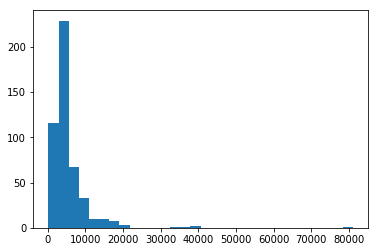


Adicionalmente haremos un histograma del monto de los creditos:


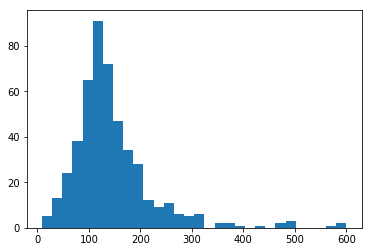

In [93]:
print("Realizaremos un histograma del Ingreso de las personas:")
plt.hist(train_set["ApplicantIncome"].astype(float),bins=30)
plt.show()
print("")
print("Adicionalmente haremos un histograma del monto de los creditos:")
plt.hist(train_set["LoanAmount"].astype(float),bins=30)
plt.show()

De los histogramos podemos notar que la gran mayoria de la poblacion percibe un ingreso meno a los 10,000 y los prestamos se concentran en en cantidades menores a los 300.

Mostraremos un boxplot del monto del prestamo, segmentado por la existencia del historial crediticio del cliente

Clientes con historial crediticio
      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
2    LP001003       1        1          1          1              0   
3    LP001005       1        1          0          1              1   
4    LP001006       1        1          0          0              0   
5    LP001008       1        0          0          1              0   
6    LP001011       1        1          2          1              1   
7    LP001013       1        1          0          0              0   
9    LP001018       1        1          2          1              0   
10   LP001020       1        1          1          1              0   
11   LP001024       1        1          2          1              0   
13   LP001028       1        1          2          1              0   
14   LP001029       1        0          0          1              0   
15   LP001030       1        1          2          1              0   
16   LP001032       1        0          0  

[70 rows x 13 columns]

Clientes con historial crediticio


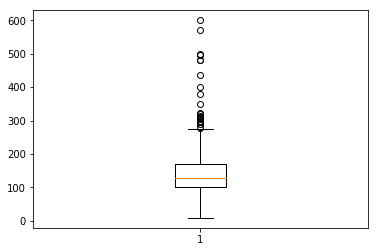

Clientes sin historial crediticio


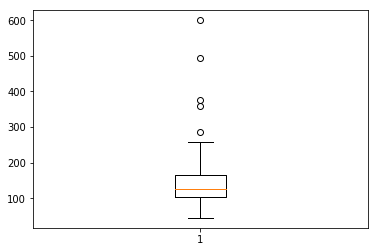

In [97]:
#Creamos bases con los clientes dependiendo de la existencia del historial crediticio
Con_Hist=train_set.drop(train_set[train_set.Credit_History=="0"].index)
print("Clientes con historial crediticio")
print(Con_Hist)
print("")
Sin_Hist=train_set.drop(train_set[train_set.Credit_History=="1"].index)
print("Clientes sin historial crediticio")
print(Sin_Hist)
print("")
#Creamos los boxplots
print("Clientes con historial crediticio")
bp1=boxplot(Con_Hist["LoanAmount"].astype(float))
show(bp1)
print("Clientes sin historial crediticio")
bp2=boxplot(Sin_Hist["LoanAmount"].astype(float))
show(bp2)

De la grafica podemos concluir que no hay diferencia en el monto del prestamo dependiendo de la existencia del historial crediticio.

Ahora mostraremos el monto del prestamos segmentado por el sexo

Hombres
      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
2    LP001003       1        1          1          1              0   
3    LP001005       1        1          0          1              1   
4    LP001006       1        1          0          0              0   
5    LP001008       1        0          0          1              0   
6    LP001011       1        1          2          1              1   
7    LP001013       1        1          0          0              0   
8    LP001014       1        1         3+          1              0   
9    LP001018       1        1          2          1              0   
10   LP001020       1        1          1          1              0   
11   LP001024       1        1          2          1              0   
13   LP001028       1        1          2          1              0   
14   LP001029       1        0          0          1              0   
15   LP001030       1        1          2          1              0  

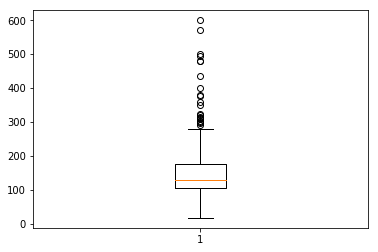

Mujeres


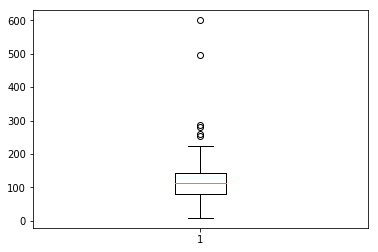

In [102]:
#Creamos bases con los clientes dependiendo de la existencia del historial crediticio
Hombres=train_set.drop(train_set[train_set.Gender==0].index)
print("Hombres")
print(Hombres)
print("")
Mujeres=train_set.drop(train_set[train_set.Gender==1].index)
print("Mujeres")
print(Mujeres)
print("")
#Creamos los boxplots
print("Hombres")
bp3=boxplot(Hombres["LoanAmount"].astype(float))
show(bp3)
print("Mujeres")
bp4=boxplot(Mujeres["LoanAmount"].astype(float))
show(bp4)

De las graficas podemos observar que aunque el promedio de los montos es muy parecido, la distribucion de los hombre se sesga hacia montos mas altos despues del 3 cuartil. Por lo que podriamos concluir que el sexo si determina el monto que reciben los clientes.